# **Formatting of training data into pixel values to be inputted into the Neural Network**

In [ ]:
import torch
import torch.nn as nn
import os
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import random
import numpy as np

print(torch.cuda.is_available())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

from zipfile import ZipFile
file_path_zip = '/content/seg_train.zip'
with ZipFile(file_path_zip, 'r') as zip:
  zip.extractall()
  print('File extracted')

data = []

def create_training_data():
  file_path = '/content/seg_train'
  types = ['buildings','tropical rainforest','glacier','mountain','sea','street','savanna','taiga','freshwater','temperate rainforest']
  for category in types:
    class_num = types.index(category)
    path = os.path.join(file_path,category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img), 3)
      
        

create_training_data()
data = np.asarray(data)
random.shuffle(data)
x = data[:,0]
y = torch.zeros(13986,10)
x = x.tolist()
Y = data[:,1]
Y = Y.tolist()

x = torch.Tensor(x)
x = x/255
x.to(device)
x.is_cuda
y_data = torch.Tensor(Y)

for n in range(13986):
  if y_data[n] == 9:
    y[n,9] += 1
  elif y_data[n] == 8:
    y[n,8] += 1
  elif y_data[n] == 7:
    y[n,7] += 1
  elif y_data[n] == 6:
    y[n,6] += 1
  elif y_data[n] == 5:
    y[n,5] += 1
  elif y_data[n] == 4:
    y[n,4] += 1
  elif y_data[n] == 3:
    y[n,3] += 1
  elif y_data[n] == 2:
    y[n,2] += 1
  elif y_data[n] == 1:
    y[n,1] += 1
  elif y_data[n] == 0:
    y[n,0] += 1

y.cuda()
y.to(device)
y.is_cuda

False
File extracted


# **Creation of Convolutional Neural Network Model and Training the model using Training Data**

In [1]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.sigmoid = nn.Sigmoid()
    self.relu = nn.ReLU()
    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 3, stride = 1)
    self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 1)
    self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
    self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 1)
    self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 32, kernel_size = 3, stride = 1)
    self.size = self.size()
    self.l1 = nn.Linear(self.size,128)
    self.l2 = nn.Linear(128,256)
    self.l3 = nn.Linear(256,512)
    self.l4 = nn.Linear(512,128)
    self.l5 = nn.Linear(128,1)
  

  def forward(self,x):
    x = self.sigmoid(x)
    x = self.conv1(x)
    x = self.relu(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.pool2(x)
    x = self.conv3(x)
    x = x.view(-1,self.size(x))
    x = self.l1(x)
    x = self.relu(x)
    x = self.l2(x)
    x = self.relu(x)
    x = self.l3(x)
    x = self.relu(x)
    x = self.l4(x)
    x = self.relu(x)
    x = self.l5(x)
    x = self.sigmoid(x)
    return x
    
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimiser = torch.optim.Adam(model.parameters(),lr=learning_rate)
iterations = 1000000
model.to(device)

for epoch in range(iterations+1):
  y_predicted = model(x)
  loss = criterion(y_predicted,y)
  loss.backward()
  optimiser.step()
  print('epoch: ' , epoch)
  if epoch == iterations:
    print('Training Complete')

torch.save(model,'/content/model')

NameError: ignored

# **Testing of Convolutional Neural Network in Testing Sequence using Testing Data**

<class 'torch.device'>
File extracted
Test set number: 543


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


No Prediction
Actual feature: forest


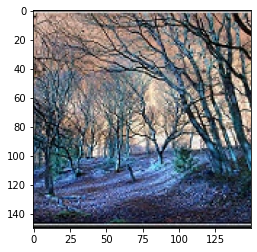

In [ ]:

torch.load('/content/model')
from zipfile import ZipFile
file_path_zip_test = '/content/seg_test.zip'
with ZipFile(file_path_zip_test, 'r') as zip:
  zip.extractall()
  print('File extracted')

data_test = []
data_color = []
test_set = int(input('Test set number: '))

def testing_data():
  file_path = '/content/seg_test'
  types = ['buildings','tropical rainforest','glacier','mountain','sea','street','savanna','taiga','freshwater','temperate rainforest']
  for category in types:
    class_num = types.index(category)
    path = os.path.join(file_path,category)  
    for img in os.listdir(path):
      img_array_test = cv2.imread(os.path.join(path,img), 1)
      img_array_color = cv2.imread(os.path.join(path,img), 1)
      
      if img_array_test.shape == (150,150,3):
        img_array_test_reshape = np.reshape(img_array_test,(67500,1))
        img_array_color_reshape = np.reshape(img_array_color,(150,150,3))
        data_test.append([img_array_test_reshape,class_num])
        data_color.append(img_array_color)

testing_data()
data_test = np.asarray(data_test)
plt.imshow(data_color[test_set])
x_test = data_test[:,0]
y_test = torch.zeros(1000,6)
x_test = x_test.tolist()
Y_test = data_test[:,1]
Y_test = Y_test.tolist()
x_test = torch.Tensor(x_test)
x_test = x_test/255
y_test_data = torch.Tensor(Y_test)

def test(x_test,Y_test):
  if model(x_test[test_set])[0] > 0.6:
    print('Predicted feature: buildings')
  elif model(x_test[test_set])[1] > 0.6:
    print('Predicted feature: tropical rainforest')
  elif model(x_test[test_set])[2] > 0.6:
    print('Predicted feature: glacier')
  elif model(x_test[test_set])[3] > 0.6:
    print('Predicted feature: mountain')
  elif model(x_test[test_set])[4] > 0.6:
    print('Predicted feature: sea')
  elif model(x_test[test_set])[5] > 0.6:
    print('Predicted feature: street')
  elif model(x_test[test_set])[6] > 0.6:
    print('Predicted feature: savanna')
  elif model(x_test[test_set])[7] > 0.6:
    print('Predicted feature: taiga')
  elif model(x_test[test_set])[8] > 0.6:
    print('Predicted feature: freshwater')
  elif model(x_test[test_set])[9] > 0.6:
    print('Predicted feature: temperate rainforest')
  else:
    print('No Prediction')

  if Y_test[test_set] == 0:
    print('Actual feature: buildings')
  elif Y_test[test_set] == 1:
    print('Actual feature: tropical rainforest')
  elif Y_test[test_set] == 2:
    print('Actual feaure: glacier')
  elif Y_test[test_set] == 3:
    print('Actual feature: mountain')
  elif Y_test[test_set] == 4:
    print('Actual feature: sea')
  elif Y_test[test_set] == 5:
    print('Actual feature: street')
  elif Y_test[test_set] == 5:
    print('Actual feature: savanna')
  elif Y_test[test_set] == 5:
    print('Actual feature: taiga')
  elif Y_test[test_set] == 5:
    print('Actual feature: freshwater')
  elif Y_test[test_set] == 5:
    print('Actual feature: temperate rainforest')

test(x_test,Y_test)